In [50]:
# First we will import the necessary Library 

import os
import pandas as pd
import numpy as np
import math
import datetime as dt

# For Evalution we will use these library

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

# For model building we will use these library

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM


# For PLotting we will use these library

import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [88]:
import yfinance as yf
import matplotlib.pyplot as plt

# Define the cryptocurrency and the currency to compare against
crypto_currency = 'BTC'
against_currency = 'USD'

# Define the ticker symbol for Yahoo Finance
ticker = f'{crypto_currency}-{against_currency}'

# Fetch the data
maindf = yf.download(ticker, start='2014-01-01', end='2024-06-30')
maindf.index.name = 'Date'
maindf.reset_index(inplace=True)
maindf



[*********************100%%**********************]  1 of 1 completed


Date          Open          High           Low         Close  \
0    2014-09-17    465.864014    468.174011    452.421997    457.334015   
1    2014-09-18    456.859985    456.859985    413.104004    424.440002   
2    2014-09-19    424.102997    427.834991    384.532013    394.795990   
3    2014-09-20    394.673004    423.295990    389.882996    408.903992   
4    2014-09-21    408.084991    412.425995    393.181000    398.821014   
...         ...           ...           ...           ...           ...   
3569 2024-06-25  60266.281250  62258.261719  60239.750000  61804.640625   
3570 2024-06-26  61789.675781  62434.136719  60695.187500  60811.277344   
3571 2024-06-27  60811.226562  62293.863281  60585.332031  61604.800781   
3572 2024-06-28  61612.804688  62126.097656  59985.402344  60320.136719   
3573 2024-06-29  60319.875000  61097.621094  60300.964844  60887.378906   

         Adj Close       Volume  
0       457.334015     21056800  
1       424.440002     34483200  
2       394.795990     37919700  
3       408.903992     36863600  
4       398.821014     26580100  
...            ...          ...  
3569  61804.640625  29201215431  
3570  60811.277344  22506003064  
3571  61604.800781  21231745045  
3572  60320.136719  24952866877  
3573  60887.378906  12652903396  

[3574 rows x 7 columns]

In [59]:
maindf.shape

(3574, 7)

In [60]:
maindf['Date']

0      2014-09-17
1      2014-09-18
2      2014-09-19
3      2014-09-20
4      2014-09-21
          ...    
3569   2024-06-25
3570   2024-06-26
3571   2024-06-27
3572   2024-06-28
3573   2024-06-29
Name: Date, Length: 3574, dtype: datetime64[ns]

In [61]:
maindf.head()

Date        Open        High         Low       Close   Adj Close  \
0 2014-09-17  465.864014  468.174011  452.421997  457.334015  457.334015   
1 2014-09-18  456.859985  456.859985  413.104004  424.440002  424.440002   
2 2014-09-19  424.102997  427.834991  384.532013  394.795990  394.795990   
3 2014-09-20  394.673004  423.295990  389.882996  408.903992  408.903992   
4 2014-09-21  408.084991  412.425995  393.181000  398.821014  398.821014   

     Volume  
0  21056800  
1  34483200  
2  37919700  
3  36863600  
4  26580100

In [62]:
maindf.tail()

Date          Open          High           Low         Close  \
3569 2024-06-25  60266.281250  62258.261719  60239.750000  61804.640625   
3570 2024-06-26  61789.675781  62434.136719  60695.187500  60811.277344   
3571 2024-06-27  60811.226562  62293.863281  60585.332031  61604.800781   
3572 2024-06-28  61612.804688  62126.097656  59985.402344  60320.136719   
3573 2024-06-29  60319.875000  61097.621094  60300.964844  60887.378906   

         Adj Close       Volume  
3569  61804.640625  29201215431  
3570  60811.277344  22506003064  
3571  61604.800781  21231745045  
3572  60320.136719  24952866877  
3573  60887.378906  12652903396

In [89]:
maindf

Date          Open          High           Low         Close  \
0    2014-09-17    465.864014    468.174011    452.421997    457.334015   
1    2014-09-18    456.859985    456.859985    413.104004    424.440002   
2    2014-09-19    424.102997    427.834991    384.532013    394.795990   
3    2014-09-20    394.673004    423.295990    389.882996    408.903992   
4    2014-09-21    408.084991    412.425995    393.181000    398.821014   
...         ...           ...           ...           ...           ...   
3569 2024-06-25  60266.281250  62258.261719  60239.750000  61804.640625   
3570 2024-06-26  61789.675781  62434.136719  60695.187500  60811.277344   
3571 2024-06-27  60811.226562  62293.863281  60585.332031  61604.800781   
3572 2024-06-28  61612.804688  62126.097656  59985.402344  60320.136719   
3573 2024-06-29  60319.875000  61097.621094  60300.964844  60887.378906   

         Adj Close       Volume  
0       457.334015     21056800  
1       424.440002     34483200  
2       394.795990     37919700  
3       408.903992     36863600  
4       398.821014     26580100  
...            ...          ...  
3569  61804.640625  29201215431  
3570  60811.277344  22506003064  
3571  61604.800781  21231745045  
3572  60320.136719  24952866877  
3573  60887.378906  12652903396  

[3574 rows x 7 columns]

In [64]:
maindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3574 entries, 0 to 3573
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3574 non-null   datetime64[ns]
 1   Open       3574 non-null   float64       
 2   High       3574 non-null   float64       
 3   Low        3574 non-null   float64       
 4   Close      3574 non-null   float64       
 5   Adj Close  3574 non-null   float64       
 6   Volume     3574 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 195.6 KB


In [65]:
maindf.describe()

Date          Open          High           Low  \
count                 3574   3574.000000   3574.000000   3574.000000   
mean   2019-08-08 12:00:00  16847.780621  17233.033958  16436.072123   
min    2014-09-17 00:00:00    176.897003    211.731003    171.509995   
25%    2017-02-26 06:00:00   1049.419983   1075.932526   1030.867554   
50%    2019-08-08 12:00:00   8845.115234   9051.989746   8666.731934   
75%    2022-01-17 18:00:00  27719.695312  28189.683105  27213.647461   
max    2024-06-29 00:00:00  73079.375000  73750.070312  71334.093750   
std                    NaN  18740.779940  19165.882053  18272.799779   

              Close     Adj Close        Volume  
count   3574.000000   3574.000000  3.574000e+03  
mean   16863.478308  16863.478308  1.730654e+10  
min      178.102997    178.102997  5.914570e+06  
25%     1050.412506   1050.412506  2.487350e+08  
50%     8842.057617   8842.057617  1.325379e+10  
75%    27741.261719  27741.261719  2.788738e+10  
max    73083.500000  73083.500000  3.509679e+11  
std    18751.089167  18751.089167  1.918445e+10

Clean Data

In [66]:
print('Null Values:',maindf.isnull().values.sum())
print('NA values:',maindf.isnull().values.any())

Null Values: 0
NA values: False


EDA(Exploratory Data Analysis)

In [87]:
maindf

Open          High           Low         Close  \
Date                                                                 
2014-09-17    465.864014    468.174011    452.421997    457.334015   
2014-09-18    456.859985    456.859985    413.104004    424.440002   
2014-09-19    424.102997    427.834991    384.532013    394.795990   
2014-09-20    394.673004    423.295990    389.882996    408.903992   
2014-09-21    408.084991    412.425995    393.181000    398.821014   
...                  ...           ...           ...           ...   
2024-06-25  60266.281250  62258.261719  60239.750000  61804.640625   
2024-06-26  61789.675781  62434.136719  60695.187500  60811.277344   
2024-06-27  60811.226562  62293.863281  60585.332031  61604.800781   
2024-06-28  61612.804688  62126.097656  59985.402344  60320.136719   
2024-06-29  60319.875000  61097.621094  60300.964844  60887.378906   

               Adj Close       Volume  
Date                                   
2014-09-17    457.334015     21056800  
2014-09-18    424.440002     34483200  
2014-09-19    394.795990     37919700  
2014-09-20    408.903992     36863600  
2014-09-21    398.821014     26580100  
...                  ...          ...  
2024-06-25  61804.640625  29201215431  
2024-06-26  60811.277344  22506003064  
2024-06-27  61604.800781  21231745045  
2024-06-28  60320.136719  24952866877  
2024-06-29  60887.378906  12652903396  

[3574 rows x 6 columns]

In [71]:
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

y_2015 = maindf.loc[(maindf['Date'] >= '2015-01-1')
                     & (maindf['Date'] < '2015-12-31')]

y_2015.drop(y_2015[['Adj Close','Volume']],axis=1)

Date        Open        High         Low       Close
106 2015-01-01  320.434998  320.434998  314.002991  314.248993
107 2015-01-02  314.079010  315.838989  313.565002  315.032013
108 2015-01-03  314.846008  315.149994  281.082001  281.082001
109 2015-01-04  281.145996  287.230011  257.612000  264.195007
110 2015-01-05  265.084015  278.341003  265.084015  274.473999
..         ...         ...         ...         ...         ...
465 2015-12-26  455.756012  457.489014  405.760010  417.273987
466 2015-12-27  416.514008  424.006989  408.882996  422.822998
467 2015-12-28  423.342987  429.769012  418.480988  422.278992
468 2015-12-29  422.097992  432.983002  420.627014  432.983002
469 2015-12-30  433.299988  434.386993  422.084015  426.619995

[364 rows x 5 columns]

In [72]:
monthvise= y_2015.groupby(y_2015['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

Open       Close
Date                             
January    251.799905  248.782547
February   232.821856  234.153645
March      269.278419  269.042259
April      235.708668  235.491534
May        237.161806  236.997001
June       236.941433  238.081766
July       278.857679  279.563740
August     252.986774  250.733805
September  233.486733  233.595533
October    262.306000  264.855356
November   346.866833  348.883332
December   422.509468  424.261133

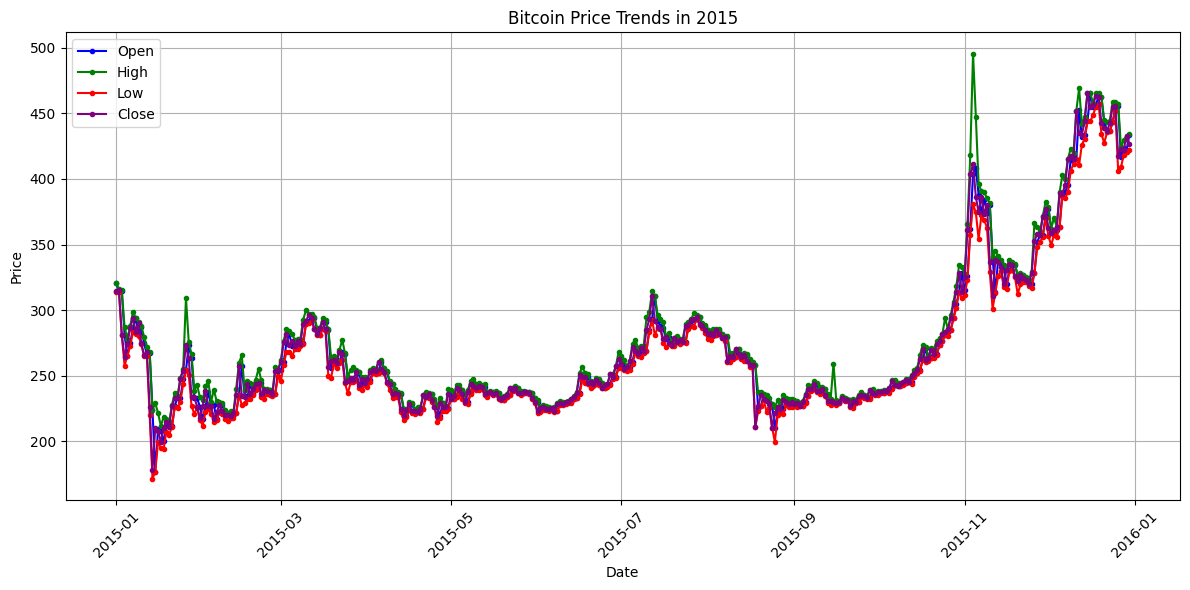

In [82]:
plt.figure(figsize=(12, 6))
plt.plot(y_2015['Date'], y_2015['Open'], marker='.', linestyle='-', color='blue', label='Open')
plt.plot(y_2015['Date'], y_2015['High'], marker='.', linestyle='-', color='green', label='High')
plt.plot(y_2015['Date'], y_2015['Low'], marker='.', linestyle='-', color='red', label='Low')
plt.plot(y_2015['Date'], y_2015['Close'], marker='.', linestyle='-', color='purple', label='Close')

plt.title('Bitcoin Price Trends in 2015')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [83]:
monthvise= y_2015.groupby(y_2015['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

Open       Close
Date                             
January    251.799905  248.782547
February   232.821856  234.153645
March      269.278419  269.042259
April      235.708668  235.491534
May        237.161806  236.997001
June       236.941433  238.081766
July       278.857679  279.563740
August     252.986774  250.733805
September  233.486733  233.595533
October    262.306000  264.855356
November   346.866833  348.883332
December   422.509468  424.261133

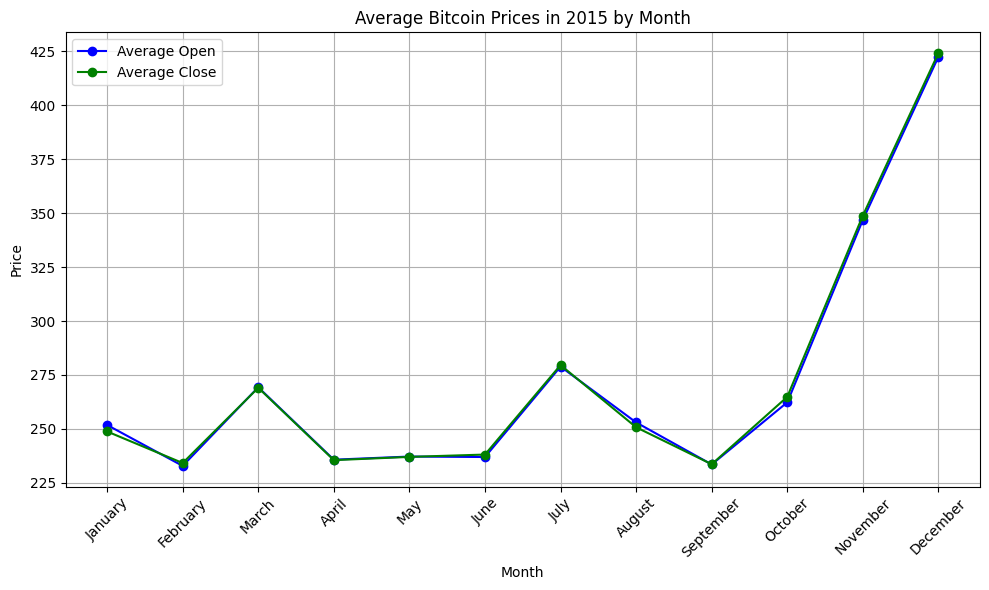

In [84]:
plt.figure(figsize=(10, 6))
plt.plot(monthvise.index, monthvise['Open'], marker='o', linestyle='-', color='blue', label='Average Open')
plt.plot(monthvise.index, monthvise['Close'], marker='o', linestyle='-', color='green', label='Average Close')

plt.title('Average Bitcoin Prices in 2015 by Month')
plt.xlabel('Month')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [90]:
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

y_2016 = maindf.loc[(maindf['Date'] >= '2016-01-01')
                     & (maindf['Date'] < '2017-01-01')]

y_2016.drop(y_2016[['Adj Close','Volume']],axis=1)

Date        Open        High         Low       Close
471 2016-01-01  430.721008  436.246002  427.515015  434.334015
472 2016-01-02  434.622009  436.062012  431.869995  433.437988
473 2016-01-03  433.578003  433.743011  424.705994  430.010986
474 2016-01-04  430.061005  434.516998  429.084015  433.091003
475 2016-01-05  433.069000  434.182007  429.675995  431.959991
..         ...         ...         ...         ...         ...
832 2016-12-27  908.354004  940.047974  904.255005  933.197998
833 2016-12-28  934.830994  975.921021  934.830994  975.921021
834 2016-12-29  975.125000  979.396973  954.502991  973.497009
835 2016-12-30  972.534973  972.534973  934.833008  961.237976
836 2016-12-31  960.627014  963.742981  947.236023  963.742981

[366 rows x 5 columns]

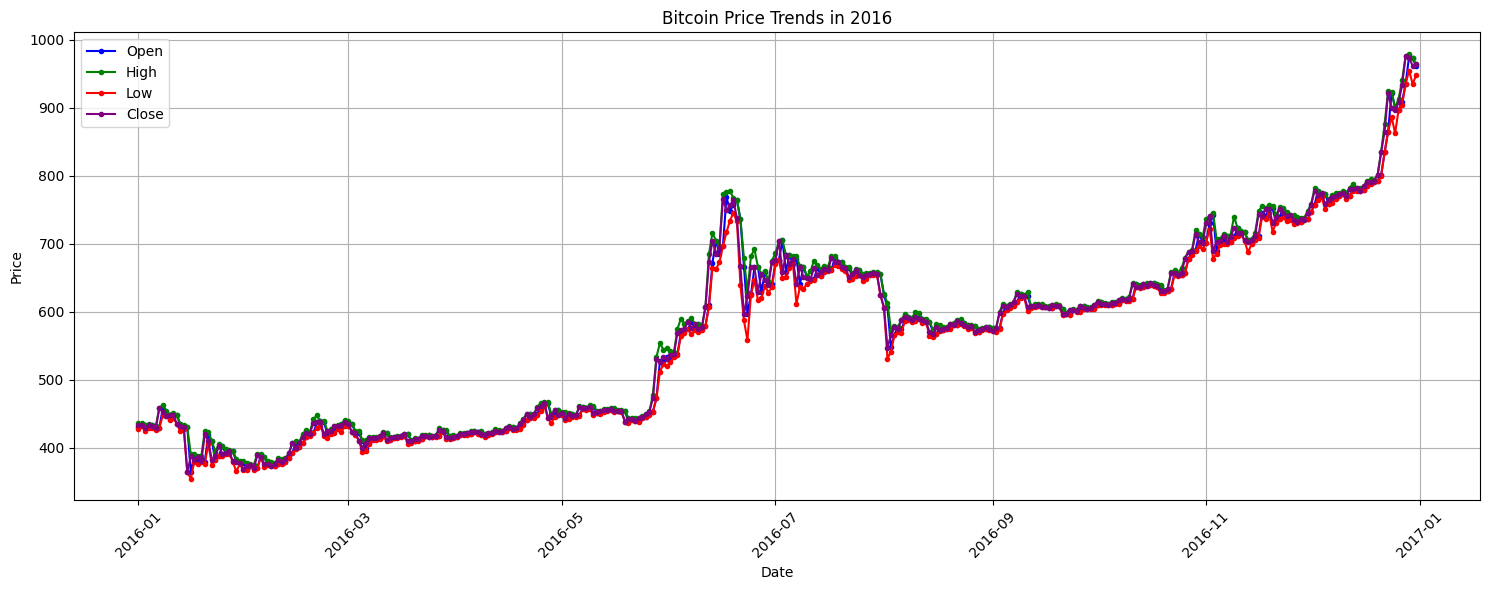

In [92]:
plt.figure(figsize=(15, 6))
plt.plot(y_2016['Date'], y_2016['Open'], marker='.', linestyle='-', color='blue', label='Open')
plt.plot(y_2016['Date'], y_2016['High'], marker='.', linestyle='-', color='green', label='High')
plt.plot(y_2016['Date'], y_2016['Low'], marker='.', linestyle='-', color='red', label='Low')
plt.plot(y_2016['Date'], y_2016['Close'], marker='.', linestyle='-', color='purple', label='Close')

plt.title('Bitcoin Price Trends in 2016')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [93]:
monthvise= y_2016.groupby(y_2016['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

Open       Close
Date                             
January    412.805902  410.844485
February   402.304692  404.408274
March      417.262033  416.525774
April      433.487433  434.339398
May        459.237547  461.954415
June       638.544834  642.869061
July       662.977779  661.356103
August     581.238966  579.585197
September  604.614034  605.848633
October    640.702546  643.550935
November   725.073804  726.349101
December   821.108255  828.060356

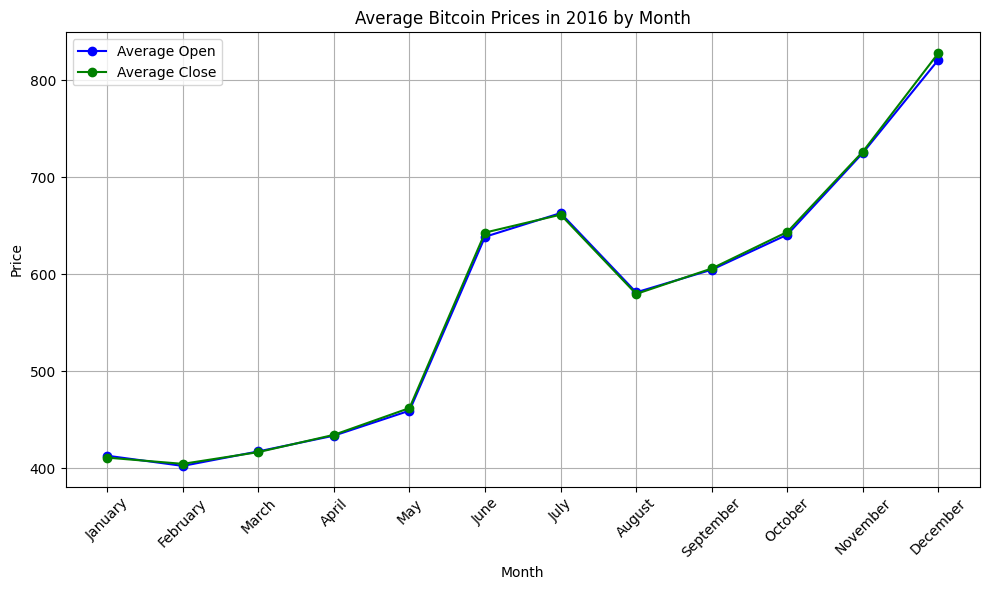

In [100]:
plt.figure(figsize=(10, 6))
plt.plot(monthvise.index, monthvise['Open'], marker='o', linestyle='-', color='blue', label='Average Open')
plt.plot(monthvise.index, monthvise['Close'], marker='o', linestyle='-', color='green', label='Average Close')

plt.title('Average Bitcoin Prices in 2016 by Month')
plt.xlabel('Month')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [103]:
y_2017 = maindf.loc[(maindf['Date'] >= '2017-01-01')
                     & (maindf['Date'] < '2018-01-01')]

y_2017.drop(y_2017[['Adj Close','Volume']],axis=1)

Date          Open          High           Low         Close
837  2017-01-01    963.658020   1003.080017    958.698975    998.325012
838  2017-01-02    998.617004   1031.390015    996.702026   1021.750000
839  2017-01-03   1021.599976   1044.079956   1021.599976   1043.839966
840  2017-01-04   1044.400024   1159.420044   1044.400024   1154.729980
841  2017-01-05   1156.729980   1191.099976    910.416992   1013.380005
...         ...           ...           ...           ...           ...
1197 2017-12-27  16163.500000  16930.900391  15114.299805  15838.500000
1198 2017-12-28  15864.099609  15888.400391  13937.299805  14606.500000
1199 2017-12-29  14695.799805  15279.000000  14307.000000  14656.200195
1200 2017-12-30  14681.900391  14681.900391  12350.099609  12952.200195
1201 2017-12-31  12897.700195  14377.400391  12755.599609  14156.400391

[365 rows x 5 columns]

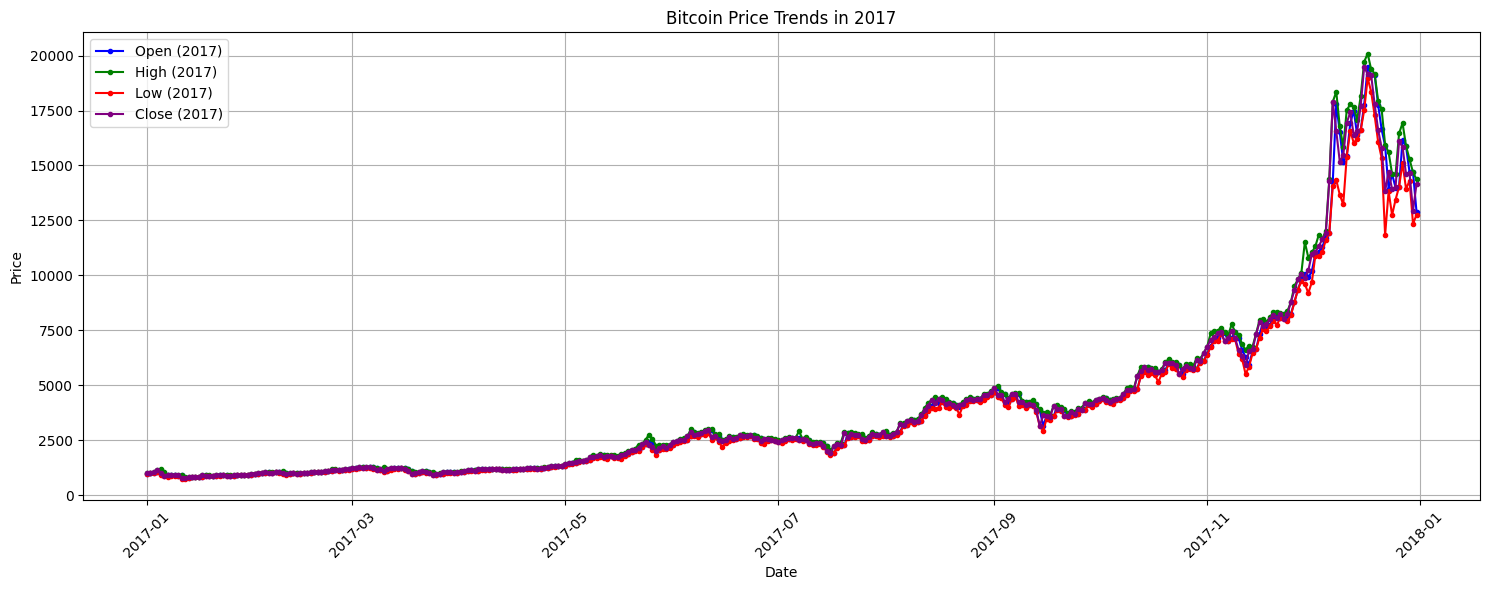

In [104]:
plt.figure(figsize=(15, 6))

# Plotting for 2017
plt.plot(y_2017['Date'], y_2017['Open'], marker='.', linestyle='-', color='blue', label='Open (2017)')
plt.plot(y_2017['Date'], y_2017['High'], marker='.', linestyle='-', color='green', label='High (2017)')
plt.plot(y_2017['Date'], y_2017['Low'], marker='.', linestyle='-', color='red', label='Low (2017)')
plt.plot(y_2017['Date'], y_2017['Close'], marker='.', linestyle='-', color='purple', label='Close (2017)')

plt.title('Bitcoin Price Trends in 2017')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [105]:
monthvise= y_2017.groupby(y_2017['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

Open         Close
Date                                 
January      914.680971    914.916159
February    1055.620071   1062.533672
March       1133.212576   1129.365228
April       1197.646997   1206.641007
May         1865.748712   1895.383529
June        2630.573332   2636.204346
July        2509.213233   2519.418386
August      3819.812579   3880.989998
September   4077.400993   4064.836312
October     5291.370007   5360.071604
November    7685.745996   7813.132975
December   15175.219601  15294.270980

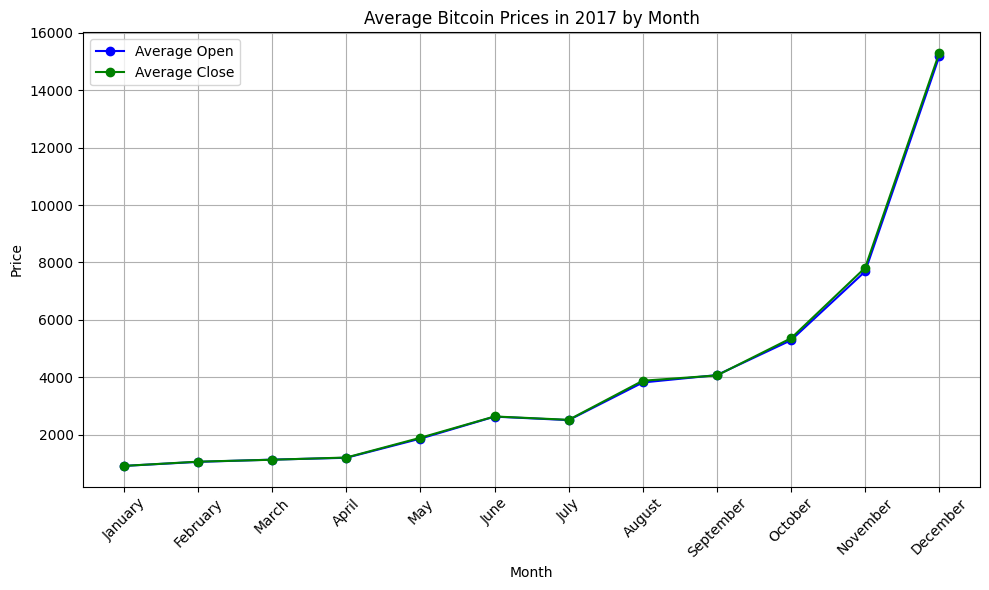

In [107]:
plt.figure(figsize=(10, 6))
plt.plot(monthvise.index, monthvise['Open'], marker='o', linestyle='-', color='blue', label='Average Open')
plt.plot(monthvise.index, monthvise['Close'], marker='o', linestyle='-', color='green', label='Average Close')

plt.title('Average Bitcoin Prices in 2017 by Month')
plt.xlabel('Month')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [109]:
y_2018 = maindf.loc[(maindf['Date'] >= '2018-01-01')
                     & (maindf['Date'] < '2019-01-01')]

y_2018.drop(y_2018[['Adj Close','Volume']],axis=1)

Date          Open          High           Low         Close
1202 2018-01-01  14112.200195  14112.200195  13154.700195  13657.200195
1203 2018-01-02  13625.000000  15444.599609  13163.599609  14982.099609
1204 2018-01-03  14978.200195  15572.799805  14844.500000  15201.000000
1205 2018-01-04  15270.700195  15739.700195  14522.200195  15599.200195
1206 2018-01-05  15477.200195  17705.199219  15202.799805  17429.500000
...         ...           ...           ...           ...           ...
1562 2018-12-27   3854.688477   3874.416992   3645.448486   3654.833496
1563 2018-12-28   3653.131836   3956.135986   3642.632080   3923.918701
1564 2018-12-29   3932.491699   3963.758789   3820.408691   3820.408691
1565 2018-12-30   3822.384766   3901.908936   3797.219238   3865.952637
1566 2018-12-31   3866.839111   3868.742920   3725.867432   3742.700439

[365 rows x 5 columns]

In [110]:
y_2019 = maindf.loc[(maindf['Date'] >= '2019-01-01')
                     & (maindf['Date'] < '2020-01-01')]

y_2019.drop(y_2019[['Adj Close','Volume']],axis=1)

Date         Open         High          Low        Close
1567 2019-01-01  3746.713379  3850.913818  3707.231201  3843.520020
1568 2019-01-02  3849.216309  3947.981201  3817.409424  3943.409424
1569 2019-01-03  3931.048584  3935.685059  3826.222900  3836.741211
1570 2019-01-04  3832.040039  3865.934570  3783.853760  3857.717529
1571 2019-01-05  3851.973877  3904.903076  3836.900146  3845.194580
...         ...          ...          ...          ...          ...
1927 2019-12-27  7238.141113  7363.529297  7189.934082  7290.088379
1928 2019-12-28  7289.031250  7399.041016  7286.905273  7317.990234
1929 2019-12-29  7317.647461  7513.948242  7279.865234  7422.652832
1930 2019-12-30  7420.272949  7454.824219  7276.308105  7292.995117
1931 2019-12-31  7294.438965  7335.290039  7169.777832  7193.599121

[365 rows x 5 columns]

In [111]:
y_2020 = maindf.loc[(maindf['Date'] >= '2020-01-01')
                     & (maindf['Date'] < '2021-01-01')]

y_2020.drop(y_2020[['Adj Close','Volume']],axis=1)

Date          Open          High           Low         Close
1932 2020-01-01   7194.892090   7254.330566   7174.944336   7200.174316
1933 2020-01-02   7202.551270   7212.155273   6935.270020   6985.470215
1934 2020-01-03   6984.428711   7413.715332   6914.996094   7344.884277
1935 2020-01-04   7345.375488   7427.385742   7309.514160   7410.656738
1936 2020-01-05   7410.451660   7544.497070   7400.535645   7411.317383
...         ...           ...           ...           ...           ...
2293 2020-12-27  26439.373047  28288.839844  25922.769531  26272.294922
2294 2020-12-28  26280.822266  27389.111328  26207.640625  27084.808594
2295 2020-12-29  27081.810547  27370.720703  25987.298828  27362.437500
2296 2020-12-30  27360.089844  28937.740234  27360.089844  28840.953125
2297 2020-12-31  28841.574219  29244.876953  28201.992188  29001.720703

[366 rows x 5 columns]

In [112]:
y_2021 = maindf.loc[(maindf['Date'] >= '2021-01-01')
                     & (maindf['Date'] < '2022-01-01')]

y_2021.drop(y_2021[['Adj Close','Volume']],axis=1)

Date          Open          High           Low         Close
2298 2021-01-01  28994.009766  29600.626953  28803.585938  29374.152344
2299 2021-01-02  29376.455078  33155.117188  29091.181641  32127.267578
2300 2021-01-03  32129.408203  34608.558594  32052.316406  32782.023438
2301 2021-01-04  32810.949219  33440.218750  28722.755859  31971.914062
2302 2021-01-05  31977.041016  34437.589844  30221.187500  33992.429688
...         ...           ...           ...           ...           ...
2658 2021-12-27  50802.609375  51956.328125  50499.468750  50640.417969
2659 2021-12-28  50679.859375  50679.859375  47414.210938  47588.855469
2660 2021-12-29  47623.871094  48119.742188  46201.496094  46444.710938
2661 2021-12-30  46490.605469  47879.964844  46060.312500  47178.125000
2662 2021-12-31  47169.371094  48472.527344  45819.953125  46306.445312

[365 rows x 5 columns]

In [113]:
y_2022 = maindf.loc[(maindf['Date'] >= '2022-01-01')
                     & (maindf['Date'] < '2023-01-01')]

y_2022.drop(y_2022[['Adj Close','Volume']],axis=1)

Date          Open          High           Low         Close
2663 2022-01-01  46311.746094  47827.312500  46288.484375  47686.812500
2664 2022-01-02  47680.925781  47881.406250  46856.937500  47345.218750
2665 2022-01-03  47343.542969  47510.726562  45835.964844  46458.117188
2666 2022-01-04  46458.851562  47406.546875  45752.464844  45897.574219
2667 2022-01-05  45899.359375  46929.046875  42798.222656  43569.003906
...         ...           ...           ...           ...           ...
3023 2022-12-27  16919.291016  16959.845703  16642.072266  16717.173828
3024 2022-12-28  16716.400391  16768.169922  16497.556641  16552.572266
3025 2022-12-29  16552.322266  16651.755859  16508.683594  16642.341797
3026 2022-12-30  16641.330078  16643.427734  16408.474609  16602.585938
3027 2022-12-31  16603.673828  16628.986328  16517.519531  16547.496094

[365 rows x 5 columns]

In [114]:
y_2023 = maindf.loc[(maindf['Date'] >= '2023-01-01')
                     & (maindf['Date'] < '2024-01-01')]

y_2023.drop(y_2023[['Adj Close','Volume']],axis=1)

Date          Open          High           Low         Close
3028 2023-01-01  16547.914062  16630.439453  16521.234375  16625.080078
3029 2023-01-02  16625.509766  16759.343750  16572.228516  16688.470703
3030 2023-01-03  16688.847656  16760.447266  16622.371094  16679.857422
3031 2023-01-04  16680.205078  16964.585938  16667.763672  16863.238281
3032 2023-01-05  16863.472656  16884.021484  16790.283203  16836.736328
...         ...           ...           ...           ...           ...
3388 2023-12-27  42518.468750  43683.160156  42167.582031  43442.855469
3389 2023-12-28  43468.199219  43804.781250  42318.550781  42627.855469
3390 2023-12-29  42614.644531  43124.324219  41424.062500  42099.402344
3391 2023-12-30  42091.753906  42584.125000  41556.226562  42156.902344
3392 2023-12-31  42152.097656  42860.937500  41998.253906  42265.187500

[365 rows x 5 columns]

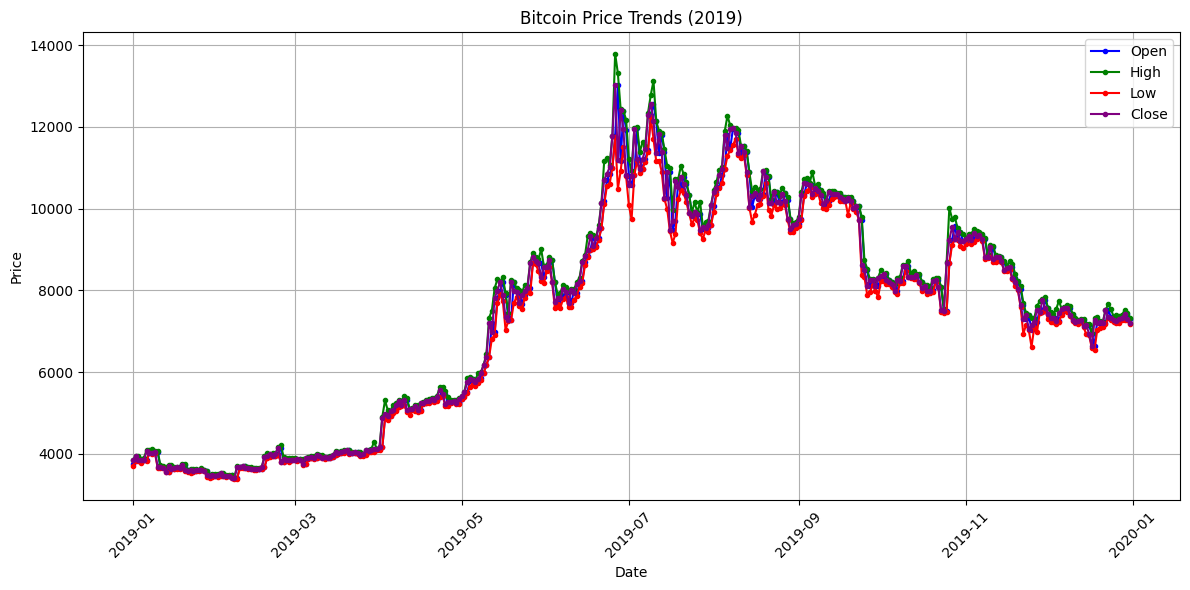

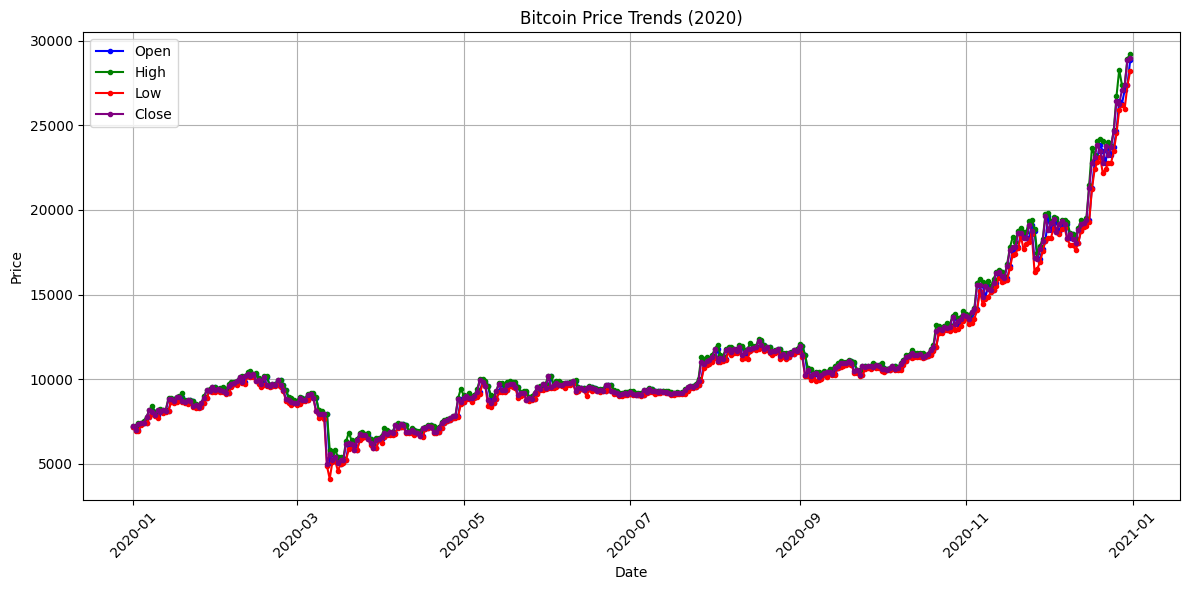

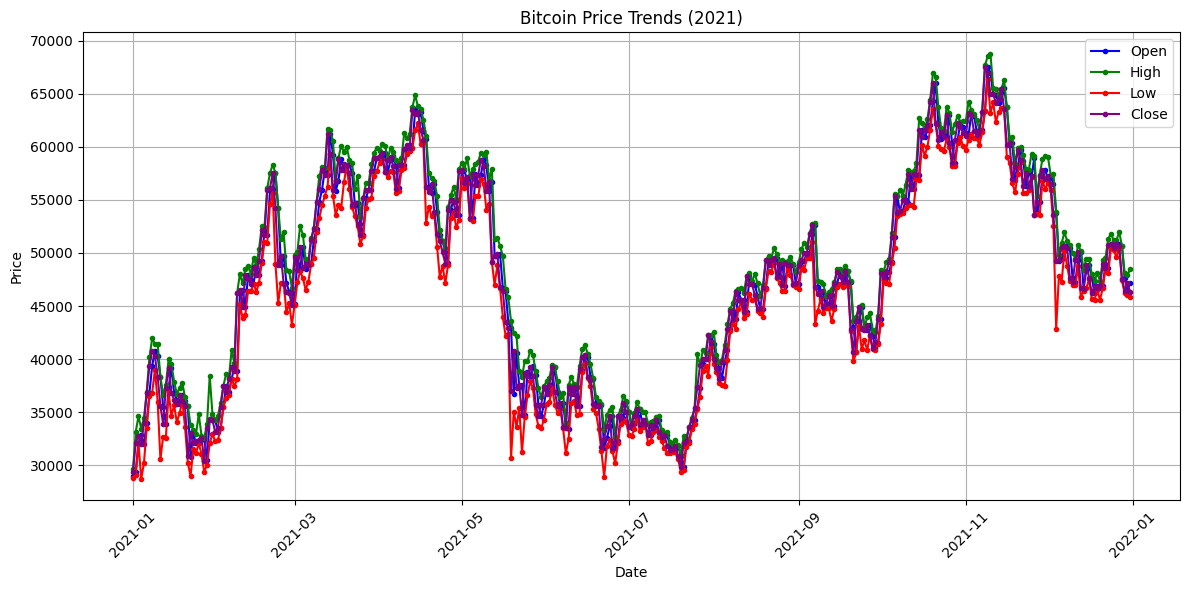

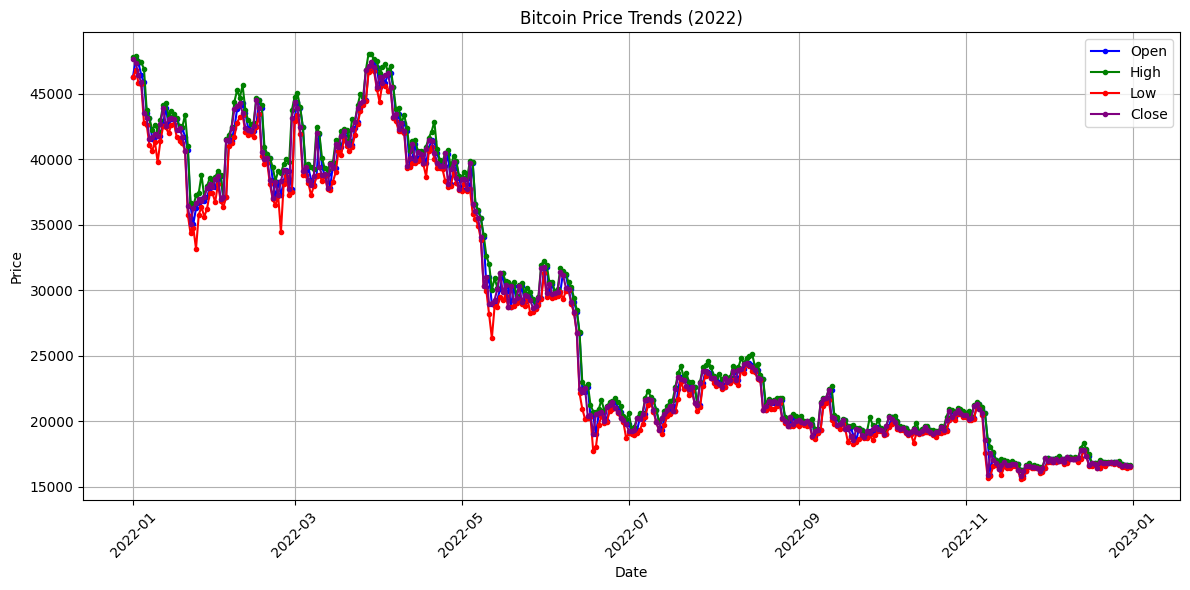

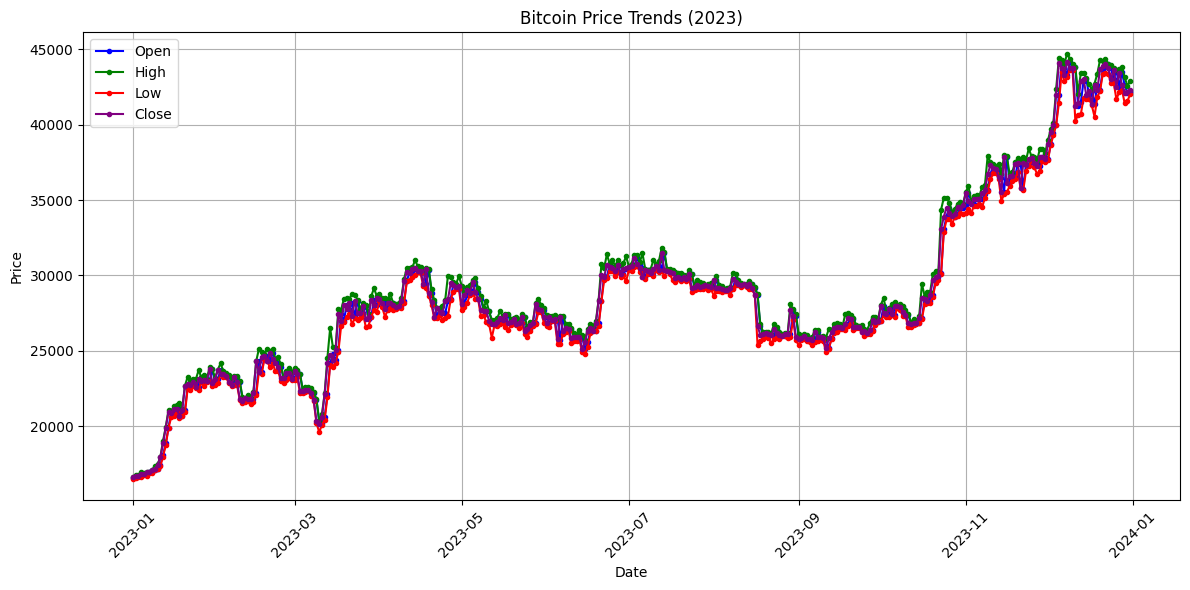

In [116]:
for year in range(2019, 2024):
    # Get the DataFrame for the current year
    year_df = globals()[f"y_{year}"]  # Assuming y_2019, y_2020, ..., y_2023 are defined DataFrames

    # Create a new figure and axis for each year's plot
    plt.figure(figsize=(12, 6))
    
    # Plot Open, High, Low, Close for the current year
    plt.plot(year_df['Date'], year_df['Open'], marker='.', linestyle='-', color='blue', label='Open')
    plt.plot(year_df['Date'], year_df['High'], marker='.', linestyle='-', color='green', label='High')
    plt.plot(year_df['Date'], year_df['Low'], marker='.', linestyle='-', color='red', label='Low')
    plt.plot(year_df['Date'], year_df['Close'], marker='.', linestyle='-', color='purple', label='Close')

    # Customize the plot
    plt.title(f'Bitcoin Price Trends ({year})')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    # Show the plot for the current year
    plt.show()


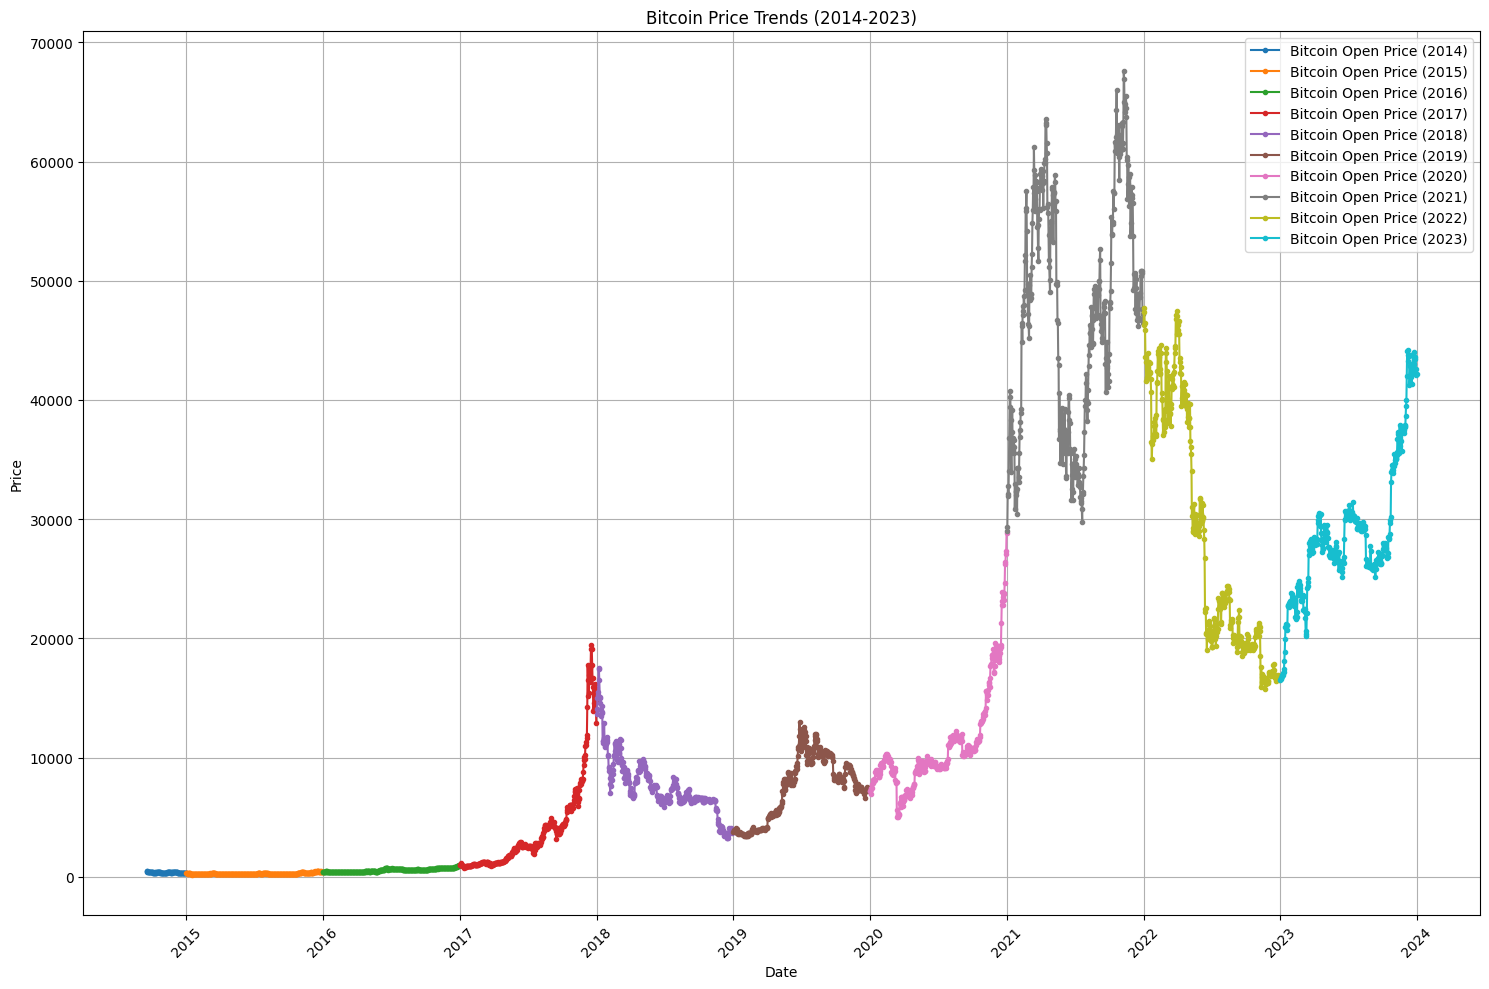

In [108]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming maindf is your DataFrame with Bitcoin price data
# Convert 'Date' column to datetime format if not already done
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

# Define a list to store plots
plt.figure(figsize=(15, 10))  # Adjust the figure size as needed

# Loop through each year from 2014 to 2023
for year in range(2014, 2024):
    # Filter data for the current year
    start_date = f'{year}-01-01'
    end_date = f'{year+1}-01-01'
    yearly_data = maindf.loc[(maindf['Date'] >= start_date) & (maindf['Date'] < end_date)]

    # Plotting
    plt.plot(yearly_data['Date'], yearly_data['Open'], marker='.', linestyle='-', label=f'Bitcoin Open Price ({year})')

# Customize the plot
plt.title('Bitcoin Price Trends (2014-2023)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


### MODEL FOR PREDICT BTC 

In [117]:
# Lets First Take all the Close Price 
closedf = maindf[['Date','Close']]
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (3574, 2)


/var/folders/sl/l8lgprdx0hqf525zxghqp3xr0000gn/T/ipykernel_70899/2837286490.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



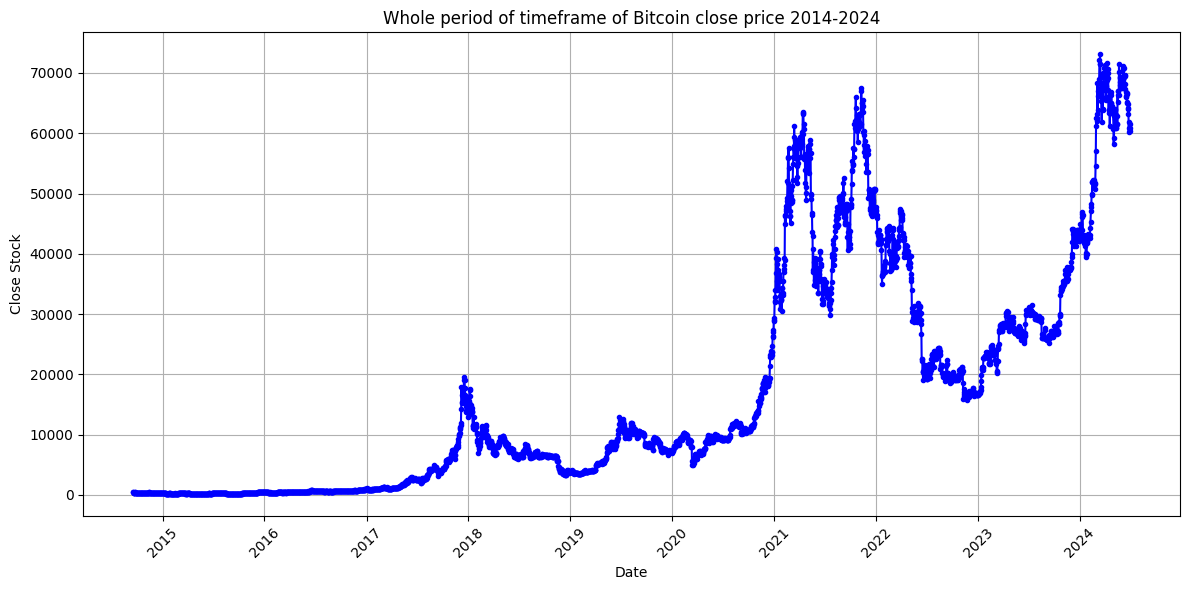

In [118]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'closedf' DataFrame contains Date and Close columns for Bitcoin close prices

# Convert 'Date' column to datetime format if needed
closedf['Date'] = pd.to_datetime(closedf['Date'], format='%Y-%m-%d')

# Create a figure and axis
plt.figure(figsize=(12, 6))

# Plotting the data using Matplotlib
plt.plot(closedf['Date'], closedf['Close'], marker='.', linestyle='-', color='blue', label='Close Stock')

# Customize the plot
plt.title('Whole period of timeframe of Bitcoin close price 2014-2024')
plt.xlabel('Date')
plt.ylabel('Close Stock')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


In [121]:
closedf = closedf[closedf['Date'] > '2023-01-19']
close_stock = closedf.copy()
print("Total data for prediction: ",closedf.shape[0])
closedf

Total data for prediction:  496


Date         Close
3078 2023-02-20  24829.148438
3079 2023-02-21  24436.353516
3080 2023-02-22  24188.843750
3081 2023-02-23  23947.492188
3082 2023-02-24  23198.126953
...         ...           ...
3569 2024-06-25  61804.640625
3570 2024-06-26  60811.277344
3571 2024-06-27  61604.800781
3572 2024-06-28  60320.136719
3573 2024-06-29  60887.378906

[496 rows x 2 columns]

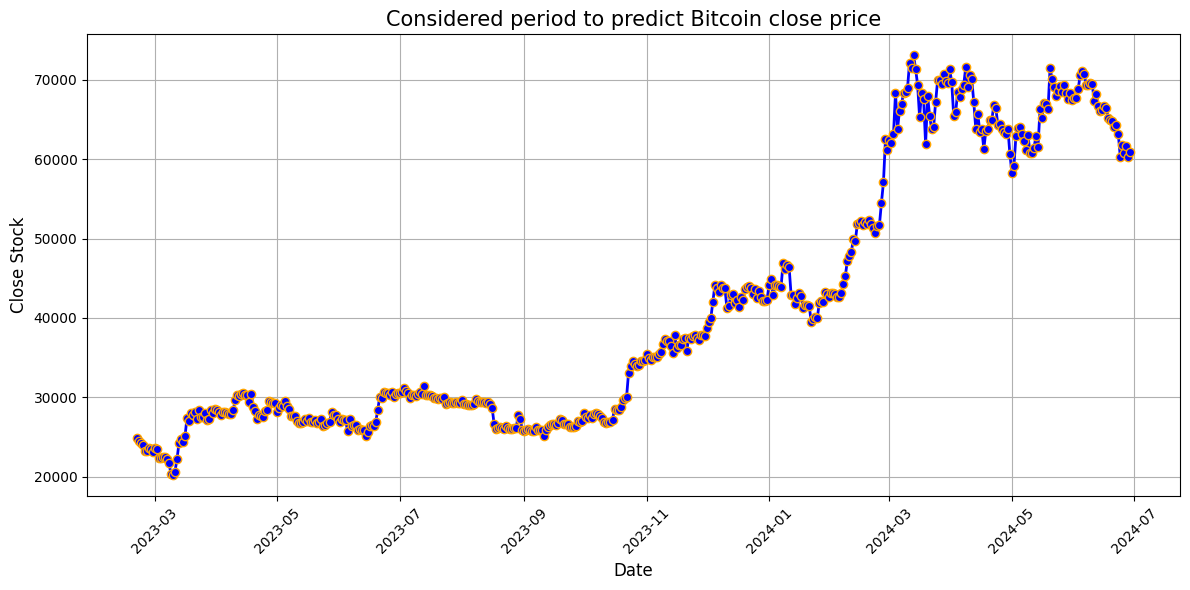

In [122]:
# Convert 'Date' column to datetime format if needed
closedf['Date'] = pd.to_datetime(closedf['Date'], format='%Y-%m-%d')

# Create a figure and axis
plt.figure(figsize=(12, 6))

# Plotting the data using Matplotlib
plt.plot(closedf['Date'], closedf['Close'], marker='o', linestyle='-', color='blue', linewidth=2, markersize=6, markeredgecolor='orange')

# Customize the plot
plt.title('Considered period to predict Bitcoin close price', fontsize=15, color='black')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Stock', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

### Normalize data for training

In [123]:
# deleting date column and normalizing using MinMax Scaler

del closedf['Date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

(496, 1)


In [124]:
training_size=int(len(closedf)*0.60)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (297, 1)
test_data:  (199, 1)


In [125]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [126]:
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (281, 15)
y_train:  (281,)
X_test:  (183, 15)
y_test (183,)


In [127]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (281, 15, 1)
X_test:  (183, 15, 1)


In [128]:
model=Sequential()

model.add(LSTM(10,input_shape=(None,1),activation="relu"))

model.add(Dense(1))

model.compile(loss="mean_squared_error",optimizer="adam")

/Users/mac/Desktop/Guaduation_Project/newchain/dataProcess/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [129]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=32,verbose=1)

Epoch 1/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0050 - val_loss: 0.0162
Epoch 2/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0013 - val_loss: 0.0042
Epoch 3/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0011 - val_loss: 0.0053
Epoch 4/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.5362e-04 - val_loss: 0.0044
Epoch 5/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.6731e-04 - val_loss: 0.0051
Epoch 6/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.6966e-04 - val_loss: 0.0093
Epoch 7/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.0205e-04 - val_loss: 0.0192
Epoch 8/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.2390e-04 - val_loss: 0.0243
Epoch 9/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.3289e-04 - val_loss: 0.0335
Epoch 10/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.5780e-04 - val_loss: 0.0510
Epoch 11/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.9989e-04 - val_loss: 0.0631
Epoch 12/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - 

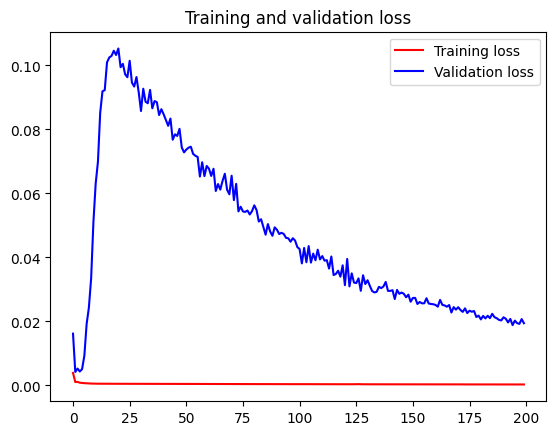

<Figure size 640x480 with 0 Axes>

In [130]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [131]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step


((281, 1), (183, 1))

In [132]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

In [133]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  919.1397410364664
Train data MSE:  844817.8635525825
Train data MAE:  639.0344125333633
-------------------------------------------------------------------------------------
Test data RMSE:  7375.7065685219195
Test data MSE:  54401047.38493739
Test data MAE:  6125.586236338798


In [134]:
print("Train data explained variance regression score:", 
      explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", 
      explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9544923862920371
Test data explained variance regression score: 0.8172180436423441


In [135]:
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("----------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))

Train data MGD:  0.0009908059724379676
Test data MGD:  0.010623463325587355
----------------------------------------------------------------------
Train data MPD:  28.46036208494901
Test data MPD:  756.6945644637489


Train predicted data:  (496, 1)
Test predicted data:  (496, 1)


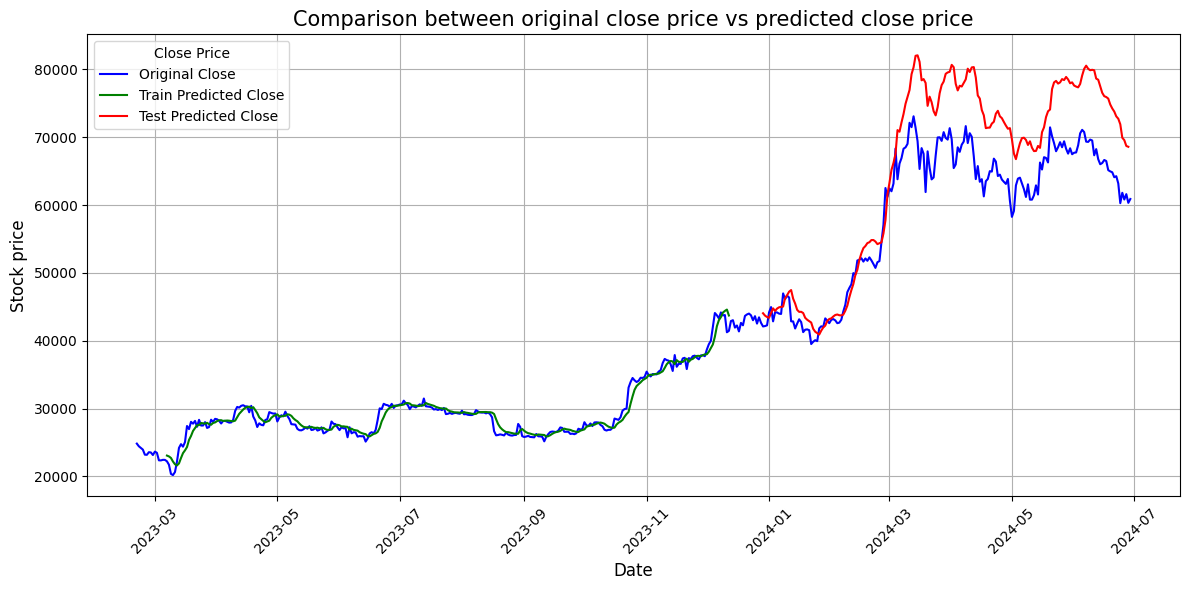

In [146]:

# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


# Create a DataFrame for plotting
plotdf = pd.DataFrame({
    'date': close_stock['Date'],
    'original_close': close_stock['Close'],
    'train_predicted_close': trainPredictPlot.reshape(1, -1)[0].tolist(),
    'test_predicted_close': testPredictPlot.reshape(1, -1)[0].tolist()
})

# Create a figure and axis
plt.figure(figsize=(12, 6))

# Plotting original close, train predicted close, and test predicted close
plt.plot(plotdf['date'], plotdf['original_close'], linestyle='-', color='blue', label='Original Close')
plt.plot(plotdf['date'], plotdf['train_predicted_close'], linestyle='-', color='green', label='Train Predicted Close')
plt.plot(plotdf['date'], plotdf['test_predicted_close'], linestyle='-', color='red', label='Test Predicted Close')

# Customize the plot
plt.title('Comparison between original close price vs predicted close price', fontsize=15, color='black')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Stock price', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Close Price')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

In [138]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        
        lst_output.extend(yhat.tolist())
        i=i+1
               
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  30


In [139]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39
 40 41 42 43 44 45]


In [145]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})
print(new_pred_plot)
names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

    last_original_days_value  next_predicted_days_value
0               6.619100e+04               6.619100e+04
1               6.663905e+04               6.663905e+04
2               6.649030e+04               6.649030e+04
3               6.514075e+04               6.514075e+04
4               6.496030e+04               6.496030e+04
5               6.482866e+04               6.482866e+04
6               6.409620e+04               6.409620e+04
7               6.425258e+04               6.425258e+04
8               6.318080e+04               6.318080e+04
9               6.027741e+04               6.027741e+04
10              6.180464e+04               6.180464e+04
11              6.081128e+04               6.081128e+04
12              6.160480e+04               6.160480e+04
13              6.032014e+04               6.032014e+04
14              6.088738e+04               6.088738e+04
15                       NaN                        NaN
16              6.760121e+04               6.760

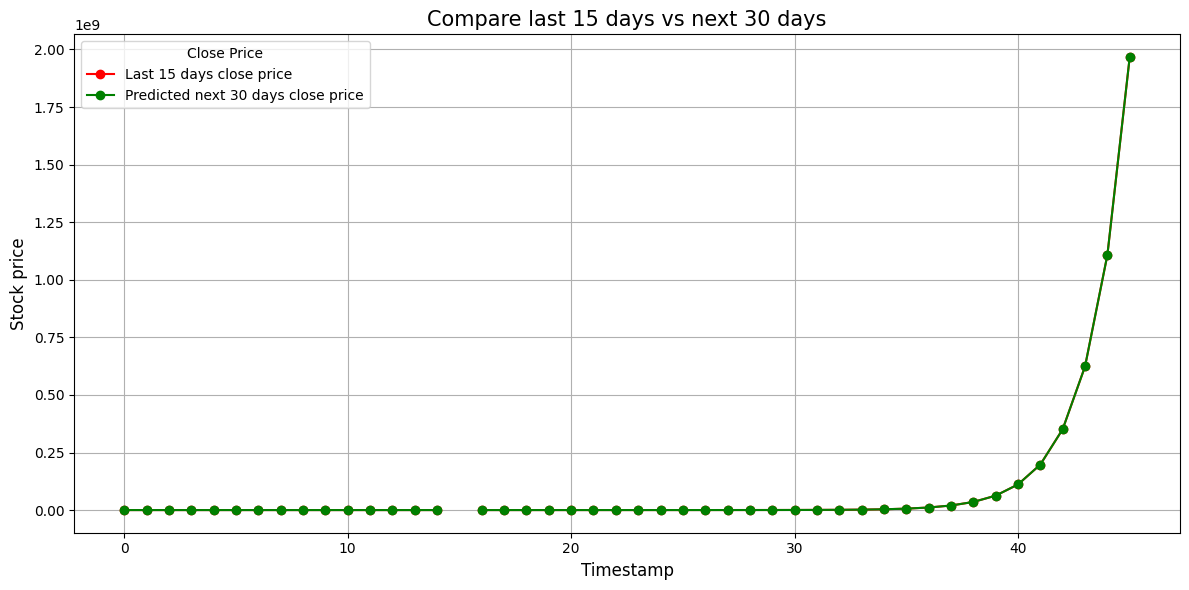

In [142]:
plt.figure(figsize=(12, 6))

# Plotting last original days value and next predicted days value
plt.plot(new_pred_plot.index, new_pred_plot['last_original_days_value'], marker='o', linestyle='-', color='red', label='Last 15 days close price')
plt.plot(new_pred_plot.index, new_pred_plot['next_predicted_days_value'], marker='o', linestyle='-', color='green', label='Predicted next 30 days close price')

# Customize the plot
plt.title('Compare last 15 days vs next 30 days', fontsize=15, color='black')
plt.xlabel('Timestamp', fontsize=12)
plt.ylabel('Stock price', fontsize=12)
plt.legend(title='Close Price')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

In [143]:
lstmdf=closedf.tolist()
lstmdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
lstmdf=scaler.inverse_transform(lstmdf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])